# 🌳 Random Forest Algorithm in Machine Learning
This notebook is designed to help you understand how the **Random Forest Algorithm** works, along with a hands-on example using the **Titanic dataset**.

We will start with the theory, then move into implementation.

---

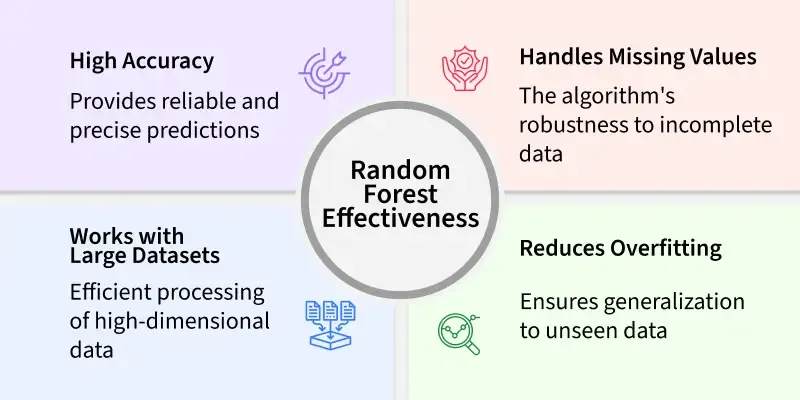

## 📖 Working of Random Forest Algorithm

- **Create Many Decision Trees**: The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.  
- **Pick Random Features**: When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.  
- **Each Tree Makes a Prediction**: Every tree gives its own answer or prediction based on what it learned from its part of the data.  
- **Combine the Predictions**:  
  - For **classification**: the final answer is the one that most trees agree on (**majority voting**).  
  - For **regression**: the final answer is the **average** of all the trees’ predictions.  

---
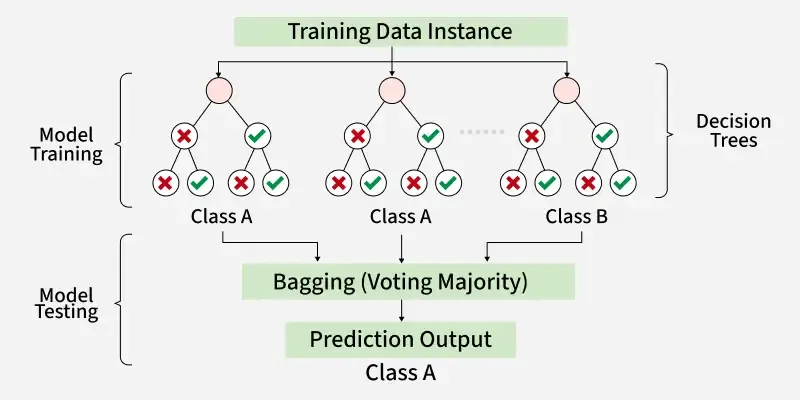

## 📖 Working of Random Forest Algorithm

- **Create Many Decision Trees**: The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.  
- **Pick Random Features**: When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.  
- **Each Tree Makes a Prediction**: Every tree gives its own answer or prediction based on what it learned from its part of the data.  
- **Combine the Predictions**:  
  - For **classification**: the final answer is the one that most trees agree on (**majority voting**).  
  - For **regression**: the final answer is the **average** of all the trees’ predictions.  

---

## ✅ Why Random Forest Works Well

- Using **random data and random features** for each tree helps avoid **overfitting**.  
- Makes the overall prediction more **accurate and trustworthy**.  

---

## 🔑 Key Features of Random Forest

- **Handles Missing Data**: Works even if some data is missing.  
- **Shows Feature Importance**: Identifies which features are most useful for predictions.  
- **Works with Big and Complex Data**: Handles large datasets efficiently.  
- **Flexible**: Can be used for **classification** and **regression** tasks.  

---

## 📌 Assumptions of Random Forest

1. Each tree makes its own decisions.  
2. Trees are built using random samples and random features.  
3. Sufficient data is required to ensure variety.  
4. Combining predictions improves accuracy.  

---

🔗 **Source/Reference:** [GeeksforGeeks – Random Forest Algorithm](https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/)

# 🛠 Implementing Random Forest for Classification (Titanic Dataset)

In this section, we will use Random Forest to **predict survival** on the Titanic.

---

## 📂 Step 1: Import Libraries

```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##📥 Step 2: Load the Titanic Dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.shape)   # rows, columns

(891, 12)


In [4]:
print(df.columns) # column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## 🧹 Step 3: Data Cleaning and Preprocessing

Remove rows with missing target values (Survived). `But why?`

Select useful features:

`What features do you think are the most important?`

Convert Sex to numeric (Male=0, Female=1). `Ask yourself why we need this step?`

Fill missing Age values with median. `Why not the average?`

In [6]:
# Inspect missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5332\922360860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5332\922360860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [8]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [10]:
# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [11]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [12]:
print("After cleaning:", df.shape)
df.head()

After cleaning: (891, 11)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,False,True,2,0
1,1,1,1,38.0,1,0,71.2833,False,False,2,0
2,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,False,True,2,0
4,0,3,0,35.0,0,0,8.0500,False,True,1,1


## ✂️ Step 4: Train-Test Split

Split the dataset into training (80%) and testing (20%).

In [13]:
# Suppose 'Survived' is the target column
X = df.drop("Survived", axis=1)   # features
y = df["Survived"]                # target

In [14]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (712, 10) (712,)
Test shape: (179, 10) (179,)


## 🌲 Step 5: Train the Random Forest Classifier

The `RandomForestClassifier()` in **scikit-learn** has many parameters that control how the forest is built and how predictions are made.  
Here are the **main arguments** you can tune and how they affect the model:

---

### 🌳 Tree-Related Parameters

- **`n_estimators`** (default=100)  
  Number of trees in the forest.  
  - More trees = more stable and accurate results, but slower training/prediction.  
  - Too few trees = higher variance, less stable predictions.  

- **`criterion`** (default="gini")  
  Function to measure quality of a split:  
  - `"gini"` → Gini Impurity  
  - `"entropy"` / `"log_loss"` → Information Gain (slower, sometimes better for imbalance).  

- **`max_depth`** (default=None)  
  Maximum depth of each tree.  
  - `None` → nodes expand until all leaves are pure or contain < `min_samples_split`.  
  - Lower values prevent overfitting but may underfit.  

- **`min_samples_split`** (default=2)  
  Minimum number of samples required to split a node.  
  - Higher values make trees more conservative (less complex).  

- **`min_samples_leaf`** (default=1)  
  Minimum number of samples at a leaf node.  
  - Larger values smooth predictions and help prevent overfitting.  
  

- **`max_features`** (default="sqrt")  
  Number of features to consider when looking for the best split:  
  - `"sqrt"` → good for classification.  
  - `"log2"` → fewer features per split.  
  - `None` → all features.  
  - Lower values increase diversity between trees but may reduce accuracy.  

- **`max_leaf_nodes`** (default=None)  
  Maximum number of leaf nodes per tree. Controls complexity.  

- **`min_impurity_decrease`** (default=0.0)  
  Node split happens only if impurity decrease is at least this value.  
  - Useful for pruning.  

---

### ⚙️ Training Process Parameters

- **`bootstrap`** (default=True)  
  Whether bootstrap samples are used (sampling with replacement).  
  - If `False`, the whole dataset is used to build each tree.  

- **`oob_score`** (default=False)  
  If `True`, use out-of-bag samples (data not used in training each tree) to estimate accuracy.  

- **`n_jobs`** (default=None)  
  Number of CPU cores to use:  
  - `-1` → use all available cores (faster training).  

- **`random_state`** (default=None)  
  Controls randomness (for reproducibility).  

- **`class_weight`** (default=None)  
  Weights associated with classes (important for imbalanced datasets).  
  - `"balanced"` → adjusts weights inversely proportional to class frequencies.  

- **`ccp_alpha`** (default=0.0)  
  Complexity parameter for Minimal Cost-Complexity Pruning.  
  - Higher values prune more aggressively.  

- **`max_samples`** (default=None)  
  Number or fraction of samples drawn for training each tree (only works if `bootstrap=True`).  



### 📝 Summary

- **More trees (`n_estimators`)** = higher stability, slower computation.  
- **Deeper trees (`max_depth`)** = higher accuracy on training, risk of overfitting.  
- **Higher `min_samples_split` / `min_samples_leaf`** = simpler trees, less overfitting.  
- **`max_features`** controls how diverse the trees are.  
- **`class_weight`** is important for imbalanced datasets.  
- **`oob_score`** gives you a free validation estimate.  

---

In [20]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # let trees grow fully
    random_state=42,         # reproducibility
    class_weight='balanced', # handle class imbalance
    n_jobs=-1                # use all CPU cores for speed
)

In [21]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [22]:
# Predictions
y_pred = rf_model.predict(X_test)

In [23]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[97 13]
 [19 50]]


##🔎 Step 6: Make Predictions



In [24]:
# Make predictions on test set
y_pred = rf_model.predict(X_test)

# (Optional) Probabilities instead of labels
y_proba = rf_model.predict_proba(X_test)[:, 1]  # probability of survival (class=1)

# Show first 10 predictions vs actual
results = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10],
    "Survival Probability": y_proba[:10]
})
print(results)


   Actual  Predicted  Survival Probability
0       0          0                  0.21
1       0          0                  0.09
2       1          0                  0.05
3       0          0                  0.03
4       1          1                  0.83
5       1          0                  0.26
6       1          1                  0.83
7       0          1                  0.86
8       0          0                  0.48
9       0          0                  0.28


## 📊 Step 7: Evaluate the Model

In [25]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[97 13]
 [19 50]]


##⭐ Extra: Feature Importance



```python
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance in Titanic Survival Prediction")
plt.show()



In [29]:
import matplotlib.pyplot as plt

In [30]:
# --- Feature Importance ---
importances = rf_model.feature_importances_
feature_names = X.columns

In [31]:
# Sort features by importance
indices = importances.argsort()

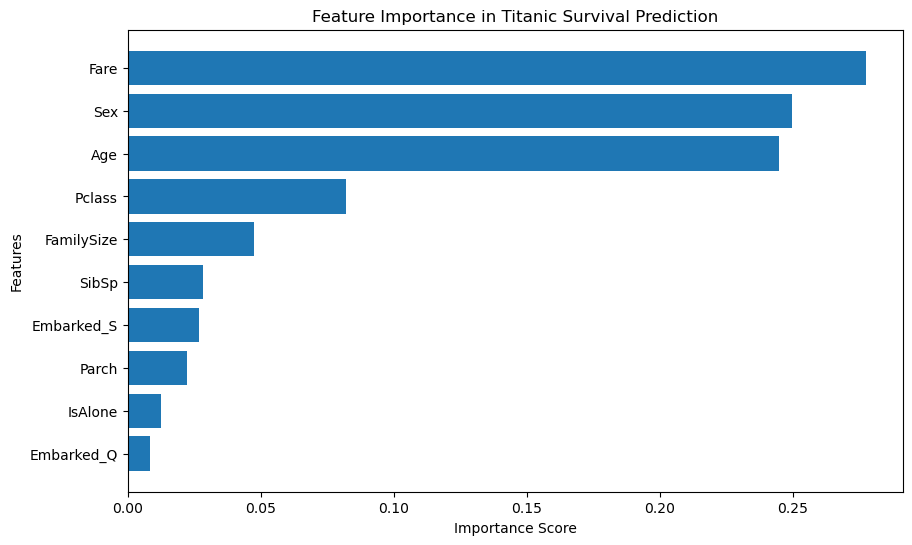

In [32]:
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Feature Importance in Titanic Survival Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

##🎯 Summary

Random Forest creates multiple decision trees using random data & features.

Predictions are combined for higher accuracy.

It is robust, handles missing data, and shows feature importance.

In our Titanic dataset, we built a Random Forest classifier to predict survival.